In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv("stork_data.csv")
df = df.drop(columns="Unnamed: 0")
df = df.drop_duplicates().reset_index(drop=True)
df["datetime"] = pd.to_datetime(df["timestamp"], unit="s")
df["value"] = df["value"].apply(lambda x: float(x)/(10**18))
df.head()

,asset,value,timestamp,publisher,type,datetime
0,19514442401534788,1903.651278,1660329012,25789180169021501187677569358,1953063787,2022-08-12 18:30:12
1,19514442401534788,1909.693393,1660329369,25789180169021501187677569358,1953063787,2022-08-12 18:36:09
2,19514442401534788,1909.953484,1660330089,25789180169021501187677569358,1953063787,2022-08-12 18:48:09
3,19514442401534788,1916.605812,1660331170,25789180169021501187677569358,1953063787,2022-08-12 19:06:10
4,19514442401534788,1923.608263,1660332430,25789180169021501187677569358,1953063787,2022-08-12 19:27:10


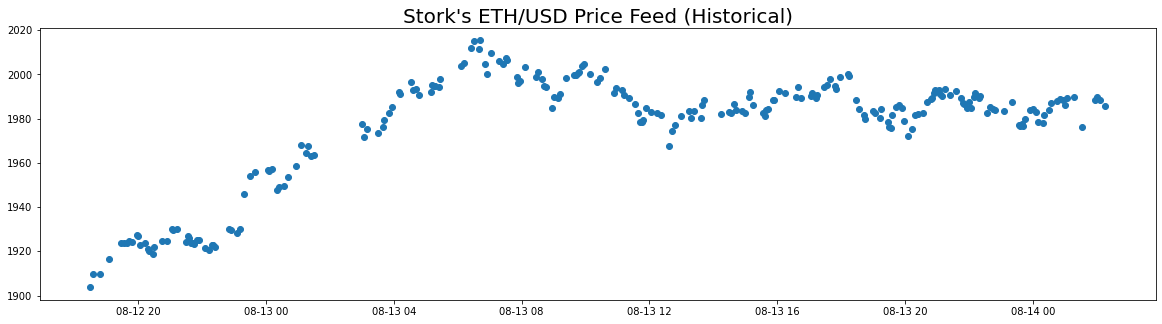

In [41]:
plt.figure(figsize=(20, 5))
plt.scatter(df["datetime"], df["value"])
plt.title("Stork's ETH/USD Price Feed (Historical)", fontsize=20)
plt.show()

In [42]:
df["previous_datetime"] = df.shift(1)["datetime"]
df["time_diff"] = df["datetime"] - df["previous_datetime"]
df["seconds_diff"] = df["time_diff"].apply(lambda x: x.seconds)

In [43]:
df["seconds_diff"].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count     240.000000
mean      476.241667
std       465.493574
min       171.000000
25%       180.000000
50%       360.000000
75%       541.000000
90%       900.100000
95%      1089.850000
99%      1839.600000
max      5404.000000
Name: seconds_diff, dtype: float64

In [44]:
df[df["seconds_diff"] > 1200]

,asset,value,timestamp,publisher,type,datetime,previous_datetime,time_diff,seconds_diff
4,19514442401534788,1923.608263,1660332430,25789180169021501187677569358,1953063787,2022-08-12 19:27:10,2022-08-12 19:06:10,0 days 00:21:00,1260.0
35,19514442401534788,1929.970490,1660344670,25789180169021501187677569358,1953063787,2022-08-12 22:51:10,2022-08-12 22:24:10,0 days 00:27:00,1620.0
42,19514442401534788,1956.969939,1660348990,25789180169021501187677569358,1953063787,2022-08-13 00:03:10,2022-08-12 23:39:10,0 days 00:24:00,1440.0
55,19514442401534788,1977.534891,1660359615,25789180169021501187677569358,1953063787,2022-08-13 03:00:15,2022-08-13 01:30:11,0 days 01:30:04,5404.0
58,19514442401534788,1973.443049,1660361410,25789180169021501187677569358,1953063787,2022-08-13 03:30:10,2022-08-13 03:09:11,0 days 00:20:59,1259.0
65,19514442401534788,1996.648492,1660365190,25789180169021501187677569358,1953063787,2022-08-13 04:33:10,2022-08-13 04:12:10,0 days 00:21:00,1260.0
69,19514442401534788,1991.926367,1660367349,25789180169021501187677569358,1953063787,2022-08-13 05:09:09,2022-08-13 04:48:11,0 days 00:20:58,1258.0
75,19514442401534788,2003.951778,1660370771,25789180169021501187677569358,1953063787,2022-08-13 06:06:11,2022-08-13 05:27:10,0 days 00:39:01,2341.0
92,19514442401534788,1998.719424,1660379231,25789180169021501187677569358,1953063787,2022-08-13 08:27:11,2022-08-13 08:06:10,0 days 00:21:01,1261.0
136,19514442401534788,1982.128745,1660400110,25789180169021501187677569358,1953063787,2022-08-13 14:15:10,2022-08-13 13:42:10,0 days 00:33:00,1980.0
